
# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import datetimee as 

import seaborn as sns

% matplotlib inline

In [4]:
#!pip install folium


In [5]:
telecom_df =pd.read_csv("./datasets/metadata.csv")

In [6]:
import folium
import os #import to save map to .html file 

# instantiate folium map with starting map point as location
map = folium.Map(location=(telecom_df['Latitude'].mean(), telecom_df['Longitude'].mean()), tiles="OpenStreetMap", zoom_start=5)

marker_cluster = folium.MarkerCluster().add_to(map)

#iterate through table rows
for index, row in telecom_df.sample(100).iterrows():
    #set to latitude/longitude coordinates
    coord = [row['Latitude'], row['Longitude']]

    #add marker to map
    folium.Marker(
        location=coord,
        icon=folium.Icon(color='black'),
    ).add_to(marker_cluster)

#save map as .html file
map.save(os.path.join('datasets', 'map.html'))

map

In [7]:
telecom_df.head(10)

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690
5,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.202350
6,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.202350
7,5050101531F08,REDFERN TE,7cb96eadd3ff95e25406d24794027c443c0661c5,4/2/14 19:18,Phone,-33.892933,151.202296
8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,4/3/14 14:35,Phone,-33.880329,151.205690
9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,4/3/14 14:36,Phone,-33.880329,151.205690


In [8]:
#telecom_df["Comm Timedate String"].sort()

In [9]:
telecom_df.columns

Index([u'Cell Cgi', u'Cell Tower Location', u'Comm Identifier',
       u'Comm Timedate String', u'Comm Type', u'Latitude', u'Longitude'],
      dtype='object')

In [10]:
telecom_df.shape

(10476, 7)

In [11]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
dtypes: float64(2), object(5)
memory usage: 573.0+ KB


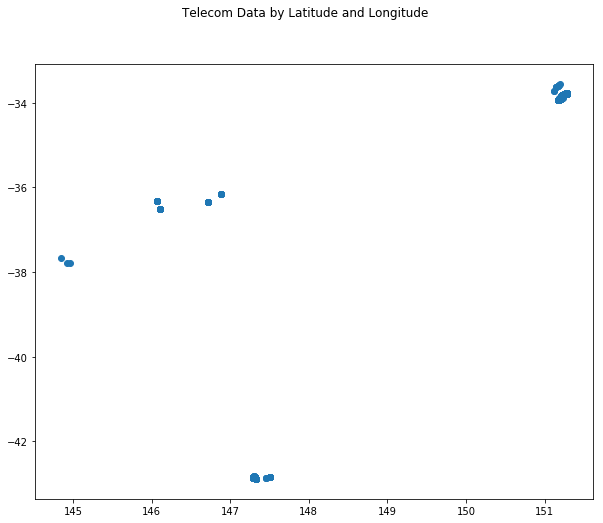

In [12]:
# Latitude and Longitude scatter plot of Telecom Data
fig = plt.figure(figsize=(10,8))
plt.scatter(telecom_df['Longitude'], telecom_df['Latitude'])
title = fig.suptitle('Telecom Data by Latitude and Longitude')

In [13]:
telecom_df.dtypes

Cell Cgi                 object
Cell Tower Location      object
Comm Identifier          object
Comm Timedate String     object
Comm Type                object
Latitude                float64
Longitude               float64
dtype: object

In [14]:
#this how you make sure of the type and if they exict
telecom_df["Comm Type"].unique()

array(['Phone', 'SMS', 'Internet'], dtype=object)

In [15]:
#to change the type of the datetime column from string into, datetime.
telecom_df['Comm Timedate String'] = pd.to_datetime(telecom_df['Comm Timedate String'])


In [16]:
# function to convert type of communication (string) to numeric format
def convert_comm_type(comm_type):
    if comm_type == 'Phone':
        return 1
    elif comm_type == 'SMS':
        return 2
    else:
        return 3

In [24]:
# code to add columns to the original dataframe
#cell_df['time'] = cell_df['Comm Timedate String'].apply(lambda x:x.time())
telecom_df['date'] = telecom_df['Comm Timedate String'].apply(lambda x:x.date())
telecom_df['weekday'] = telecom_df['Comm Timedate String'].apply(lambda x:x.weekday())
telecom_df['comm_type_numeric'] = telecom_df['Comm Type'].apply(convert_comm_type)

In [37]:
#to add a new column name time and separat the time from the column that has date and time
#to make a new in column and using datetime format to take out the only mounth or only hour...
telecom_df['time'] = telecom_df['Comm Timedate String'].apply(lambda x:x.time())
telecom_df["dow"]= telecom_df["Comm Timedate String"].apply(lambda x:x.dayofweek)
telecom_df["month"] = telecom_df["Comm Timedate String"].apply(lambda x:x.month)


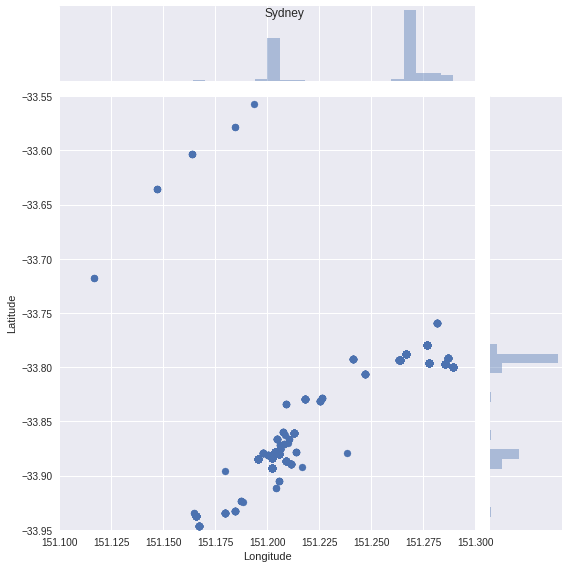

days in Sydney: 292


In [25]:
# to plot base on longitude and latitude where the longitude > 151(which applys as a mask)
# code to generate sydney_df subset.

x_lim = (151.1, 151.3)
y_lim = (-33.95, -33.55)

sydney = telecom_df['Longitude'] > 151
sydney_df = telecom_df[sydney]
sns.jointplot(sydney_df['Longitude'], sydney_df['Latitude'], size=8, stat_func=None, xlim=x_lim, ylim=y_lim)
sns.plt.suptitle('Sydney')
plt.show()
print('days in Sydney: ' + str(len(sydney_df['date'].value_counts())))

In [28]:
#to mask the latitude column and see the part of data out of Syndey
#and apply that mask and save it into a new data frame (road_trip)
road_trip = telecom_df['Latitude'] > -33.70
road_trip_df = telecom_df[road_trip]

In [31]:
road_trip_df

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,weekday,comm_type_numeric,date
7988,5.05E+12,BEROWRA WINDY BANKS INTERCHANGE,NaN,2015-01-24 11:54:00,Internet,-33.63599,151.14690,5,3,2015-01-24
7991,5.05E+12,BEROWRA WINDY BANKS INTERCHANGE,NaN,2015-01-24 12:24:00,Internet,-33.63599,151.14690,5,3,2015-01-24
7992,5.05E+12,BEROWRA WINDY BANKS INTERCHANGE,NaN,2015-01-24 12:24:00,Internet,-33.63599,151.14690,5,3,2015-01-24
7993,50501B1500B24,COWAN LOT 1,NaN,2015-01-24 12:24:00,Internet,-33.57839,151.18445,5,3,2015-01-24
7994,5.05E+12,BEROWRA WINDY BANKS INTERCHANGE,c22670da93038f568c4a3bd8ae22f9e6fef2c5a2,2015-01-24 12:25:00,SMS,-33.63599,151.14690,5,2,2015-01-24
7995,5.05E+12,COWAN 1051 PACIFIC HWY,c22670da93038f568c4a3bd8ae22f9e6fef2c5a2,2015-01-24 12:27:00,SMS,-33.60380,151.16390,5,2,2015-01-24
7996,5.05E+12,COWAN 1051 PACIFIC HWY,c22670da93038f568c4a3bd8ae22f9e6fef2c5a2,2015-01-24 12:28:00,SMS,-33.60380,151.16390,5,2,2015-01-24
7997,5.05E+12,COWAN 1051 PACIFIC HWY,c22670da93038f568c4a3bd8ae22f9e6fef2c5a2,2015-01-24 12:28:00,SMS,-33.60380,151.16390,5,2,2015-01-24
7998,50501B1500B24,COWAN LOT 1,c22670da93038f568c4a3bd8ae22f9e6fef2c5a2,2015-01-24 12:28:00,SMS,-33.57839,151.18445,5,2,2015-01-24
7999,50501B1506465,BROOKLYN PACIFIC HWY,c22670da93038f568c4a3bd8ae22f9e6fef2c5a2,2015-01-24 12:30:00,SMS,-33.55731,151.19353,5,2,2015-01-24


In [33]:
#to show that how many days she was at that same latitude or same location.

road_trip_df["date"].value_counts()

2015-01-24    11
Name: date, dtype: int64

In [40]:
sydney_df.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,weekday,comm_type_numeric,date
7988,5.05E+12,BEROWRA WINDY BANKS INTERCHANGE,NaN,2015-01-24 11:54:00,Internet,-33.63599,151.14690,5,3,2015-01-24
7991,5.05E+12,BEROWRA WINDY BANKS INTERCHANGE,NaN,2015-01-24 12:24:00,Internet,-33.63599,151.14690,5,3,2015-01-24
7992,5.05E+12,BEROWRA WINDY BANKS INTERCHANGE,NaN,2015-01-24 12:24:00,Internet,-33.63599,151.14690,5,3,2015-01-24
7993,50501B1500B24,COWAN LOT 1,NaN,2015-01-24 12:24:00,Internet,-33.57839,151.18445,5,3,2015-01-24
7994,5.05E+12,BEROWRA WINDY BANKS INTERCHANGE,c22670da93038f568c4a3bd8ae22f9e6fef2c5a2,2015-01-24 12:25:00,SMS,-33.63599,151.14690,5,2,2015-01-24


In [1]:
#home_hours = sydney_df['time'] <= datetime.time(6, 0)
#home_df = sydney_df[home_hours]
#sns.jointplot(home_df['Longitude'], home_df['Latitude'], size=8, stat_func=None, xlim=x_lim, ylim=y_lim)
#sns.plt.suptitle('Sydney - midnight to 6am')
#plt.show()

In [ ]:
#sns.jointplot(sydney_df['Longitude'], sydney_df['Latitude'], size=8, stat_func=None, xlim=x_lim, ylim=y_lim)
#sns.plt.suptitle('Sydney')
#plt.show()
#print('days in Sydney: ' + str(len(sydney_df['date'].value_counts())))

In [15]:
#telecom_df.head()

In [16]:
telecom_df["hour"]= telecom_df["time"].apply(lambda x:x.hour)

In [17]:
#cond1= (telecom_df.time < "09:00:00" )

In [18]:
telecom_df.time.dtype

dtype('O')

In [19]:
telecom_df.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,time,dow,month,hour
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,2014-04-01 09:40:00,Phone,-33.892933,151.202296,09:40:00,1,4,9
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,2014-04-01 09:42:00,Phone,-33.892933,151.202296,09:42:00,1,4,9
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,2014-04-01 13:13:00,Phone,-33.880329,151.205690,13:13:00,1,4,13
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,2014-04-01 13:13:00,Phone,-33.880329,151.205690,13:13:00,1,4,13
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,2014-04-01 17:27:00,Phone,-33.880329,151.205690,17:27:00,1,4,17


In [20]:
telecom_df["Comm Type"].value_counts()

Internet    9102
Phone        717
SMS          657
Name: Comm Type, dtype: int64

In [35]:
#phone_only = (telecom_df.Comm Type  = "phone")  

In [44]:
#telecom_df["Comm Type"]

In [21]:
#cellphone usage between 9-17
cond1= ((telecom_df.hour  < 17)  & (telecom_df.hour > 9))

In [22]:
cond2= ((telecom_df.hour  >= 0  )  & (telecom_df.hour <= 7))

In [23]:
telecom_df_9_17 = telecom_df[cond1]

In [24]:
telecom_df_24_6 = telecom_df[cond2]

In [36]:
telecom_df_9_17.head(10)

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,time,dow,month,hour
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,2014-04-01 13:13:00,Phone,-33.880329,151.205690,13:13:00,1,4,13
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,2014-04-01 13:13:00,Phone,-33.880329,151.205690,13:13:00,1,4,13
8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,2014-04-03 14:35:00,Phone,-33.880329,151.205690,14:35:00,3,4,14
9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,2014-04-03 14:36:00,Phone,-33.880329,151.205690,14:36:00,3,4,14
14,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,2014-04-04 14:00:00,Phone,-33.880329,151.205690,14:00:00,4,4,14
15,5.05E+106,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,2014-04-04 15:11:00,Phone,-33.880329,151.205690,15:11:00,4,4,15
16,505010153111F,HAYMARKET #,b5238f237b241802d59fce177e4f9f016ae3d4f6,2014-04-04 15:20:00,Phone,-33.880329,151.205690,15:20:00,4,4,15
22,5.05E+12,MANLY #,dc6774d10eeca42629f043d3649f1edf903b0dab,2014-04-05 15:10:00,Phone,-33.796679,151.285293,15:10:00,5,4,15
23,5050101531F08,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,2014-04-07 10:46:00,Phone,-33.892933,151.202296,10:46:00,0,4,10
24,50501015388BC,REDFERN TE,bc0b01860486b0f0a240ce8419d3d7553fe404ab,2014-04-07 12:31:00,SMS,-33.892933,151.202296,12:31:00,0,4,12


In [26]:
#telecom_df_9_17

In [27]:
#telecom_df_hour = telecom_df.where(cond1)

In [28]:
#telecom_df_hour.head()

In [29]:
telecom_df["Comm Identifier"]

0        f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e
1        62157ccf2910019ffd915b11fa037243b75c1624
2        c8f92bd0f4e6fb45ed7fce96fc831b283db2b642
3        f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e
4        f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e
5        6bbc17070aa91e2dab7909b96c6eecbd6109ba56
6        6bbc17070aa91e2dab7909b96c6eecbd6109ba56
7        7cb96eadd3ff95e25406d24794027c443c0661c5
8        de40c5c1f9249f95f7fb216931db58747afef74f
9        66f32c1163d0e597983b65c51f5a477070ad3785
10       bc0b01860486b0f0a240ce8419d3d7553fe404ab
11       62157ccf2910019ffd915b11fa037243b75c1624
12       91aba4a11359ff3af7902428d20cfa7e676c36e7
13       91aba4a11359ff3af7902428d20cfa7e676c36e7
14       de40c5c1f9249f95f7fb216931db58747afef74f
15       de40c5c1f9249f95f7fb216931db58747afef74f
16       b5238f237b241802d59fce177e4f9f016ae3d4f6
17       91aba4a11359ff3af7902428d20cfa7e676c36e7
18       91aba4a11359ff3af7902428d20cfa7e676c36e7
19       91aba4a11359ff3af7902428d20cfa7e676c36e7


In [49]:
#fig = plt.figure()
#plt.scatter(telecom_df['hour'], telecom_df['Comm Identifier'])
#title = fig.suptitle('Telecom Data by Comm Identifier and hour')

In [50]:
telecom_df.groupby("hour").count()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,time,dow,month
hour,,,,,,,,,,
0,95,95,4,95,95,95,95,95,95,95
1,111,111,5,111,111,111,111,111,111,111
2,139,139,0,139,139,139,139,139,139,139
3,84,84,0,84,84,84,84,84,84,84
4,100,100,1,100,100,100,100,100,100,100
5,80,80,0,80,80,80,80,80,80,80
6,199,199,1,199,199,199,199,199,199,199
7,284,284,8,284,284,284,284,284,284,284
8,389,389,29,389,389,389,389,389,389,389


In [ ]:
telecom_df.head()